In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [80]:
def f(w,t):
    sigma=10
    rho=28
    beta=8/3
    x,y,z=w
    dxdt=sigma*(y-x)
    dydt=x*(rho-z)-y
    dzdt=x*y-beta*z
    return np.array([dxdt,dydt,dzdt])

In [81]:
def RK4(f,c,t):
    dt=t[1]-t[0]
    n=len(t)
    N=len(c)
    w=np.zeros((n,N))
    w[0]=c
    for i in range(0,n-1):
        k1=f(w[i],t[i])
        k2=f(w[i]+dt/2*k1,t[i]+dt/2)
        k3=f(w[i]+dt/2*k2,t[i]+dt/2)
        k4=f(w[i]+dt*k3,t[i]+dt)
        w[i+1]=w[i]+dt/6*(k1+2*(k2+k3)+k4)
    return w

In [83]:
t=np.arange(0,40,0.01)
c=[1,1,1]
L_attractor=RK4(f,c,t)


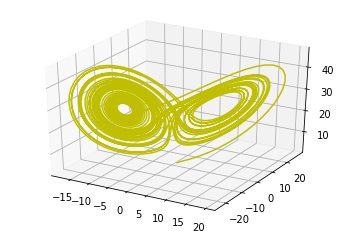

In [84]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(L_attractor[:, 0],L_attractor[:, 1],L_attractor[:, 2], color="y")
plt.draw()
plt.show()

In [132]:
def f(T,t):
    return ((1-alpha)*S)/(4*C)-(epsilon*sigma*(T**4)/C)

In [143]:
def Scheme(f,t):
    dt=14
    N=len(t)
    z=np.zeros(N)
    z[0]=299.52
    F=np.zeros(N)
    for i in range(N-1):
        k1=f(z[i],t[i])
        t3h=t[i]+(3/4)*dt
        z3h=z[i]+(3/4)*dt*k1
        k2=f(z3h,t3h)
        z[i+1]=z[i]+(1/3)*dt*(k1+2*k2)
    return z

In [146]:
def exact(t):
    F=np.zeros(len(t))
    for i in range(len(t)):  
        F[i]=10*np.exp(-0.0388*t[i])+289.52
    return F



dt=14
alpha=0.3
C=85
S=1367
epsilon=0.6
sigma=5.67*10**(-8)
t=np.arange(0,310+dt,dt)
z=Scheme(f,t)

In [149]:
F=exact(t)
F

array([299.52      , 295.32886438, 292.89429054, 291.48007962,
       290.65858367, 290.18138781, 289.90419121, 289.74317146,
       289.64963728, 289.59530454, 289.56374338, 289.54540994,
       289.53476029, 289.52857405, 289.52498055, 289.52289313,
       289.52168058, 289.52097623, 289.52056708, 289.52032941,
       289.52019135, 289.52011115, 289.52006457, 289.52003751])

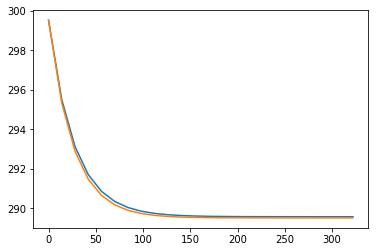

In [151]:
plt.plot(t,z)
plt.plot(t,F)
plt.show()

# Assignment2

In [196]:
def k(x):
    return x**2
def f(x):
    return -2*x-6*x**2

In [199]:
N=100
a=0;b=1;h=(b-a)/N;beta=2;alpha=0

A=np.zeros((N-1,N-1))
F=np.zeros(N-1)
x=[]
for i in range(N-1):
    x_1=a+(1+i)*h
    x.append(x_1)
    F[i]=h**2*f(x[i])
    F[0]=F[0]+alpha*k(h/2)
    F[N-2]=F[N-2]+beta*k(h*N-(h/2))

for i in range(N-2):
    A[i,i]=k(x[i]-h/2)+k(x[i]+h/2)
    A[i,i+1]=A[i+1,i]=-k(x[i]+h/2)
    A[N-2,N-2]=k(h*N-(3/2)*h)+k(h*N-(1/2)*h)

In [201]:
U=np.matmul(np.linalg.inv(A),F)

In [206]:
U1=[alpha]+U.tolist()+[beta]
x1=[a]+x+[b]

E=np.zeros(N+1)
for i in range(N+1):
    E[i]=x1[i]*(1+x1[i])

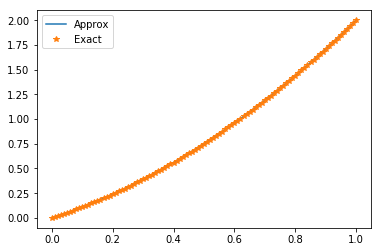

In [211]:
plt.plot(x1,U1)
plt.plot(x1,E,"*")
plt.legend(["Approx","Exact"])
plt.show()